### Support Vector Machine(SVM) is very popular supervised machine learning algorithm used for classification or regression problems, ideal for small datasets. Support vectors are data points nearest to the hyperplane, the point of the dataset that if removed would alter the position of the hyperplane. Because of this, they can be considered the critical elements of the dataset which help us build SVM.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

y = np.array([-1,-1,1,1,1])

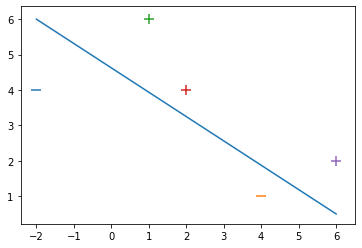

In [3]:
for d, sample in enumerate(X):
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)
        
plt.plot([-2, 6], [6, 0.5])

In [4]:
def svm_sgd_plt(X, Y):
    w = np.zeros(len(X[0]))
    
    eta = 1
    
    epochs = 1000
    
    errors = []
    
    for epoch in range(1, epochs):
        error = 0
        for i, x in enumerate(X):
            if (Y[i] * np.dot(X[i], w)) < 1:
                w = w + eta * ( (X[i] * Y[i] + (-2 * (1/epoch)*w)))
                error = 1
            else:
                w = w + eta * (-2 *(1/epoch)* w)
        errors.append(error)
        
    # lets plot the rate of classification errors during training for our SVM
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
    return w

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


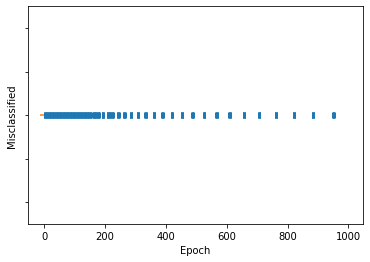

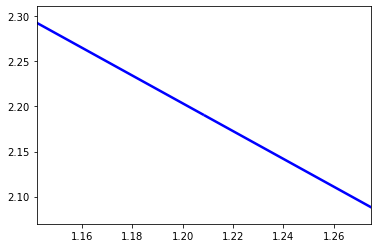

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

w = svm_sgd_plt(X, y)

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]



x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')